Я работаю в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Предобработка данных

#### Заменим названия столбцов (приведем к нижнему регистру)

In [41]:
data.columns = data.columns.str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных 

In [42]:
#Заменим тип данных в столбцах year_of_release и critic_score
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')
data['critic_score'] = data['critic_score'].fillna(0).astype('int') 
display(data.head()) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN


#### Обработаем пропуски 

In [43]:
#Удалим пропуски
data = data.dropna(subset=['name','genre'])
# Значение tbd от английского To Be Determined (будет определено)
#используется, если какая-то информация еще не определена или решение по вопросу не принято
#поэтому заменим его на none
data = data.replace('tbd', np.NaN)
data.info()
data.loc[data['user_score'].isna(), 'user_score'] = -1
data['user_score'] = data['user_score'].astype(float)
display(data['user_score'].unique())

def replace_wrong_user_scores(wrong_user_scores, correct_user_score):
    data['rating'] = data['rating'].replace(wrong_user_scores, correct_user_score)
replace_wrong_user_scores(np.NaN, 'unknow')
display(data['rating'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

array(['E', 'unknow', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

#### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец

In [44]:
# Cчитаем сумарные продажи 
data['amount'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,-1.0,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,-1.0,unknow,31.38


### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [45]:
#Посмотрим , сколько игр выпускалось в каждом году.
games_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_year

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


Вывод:Мы посмотрели,сколько игр выпускалась в каждом году. Но для дальнейшего анализа,мы возьмем данные только за последние три года.

In [46]:
#Выделим нужные нам года 
data2=data.query("2014 <= year_of_release <= 2016")
data2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,-1.0,unknow,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,-1.0,unknow,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,-1.0,unknow,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,-1.0,unknow,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,-1.0,unknow,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,-1.0,unknow,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,-1.0,unknow,0.01


#### Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

          amount
platform        
PS4       288.15
XOne      140.36
3DS        86.68
PS3        68.18
X360       48.22
WiiU       42.98
PC         27.05
PSV        22.40
Wii         5.07
PSP         0.36


<AxesSubplot:xlabel='year_of_release'>

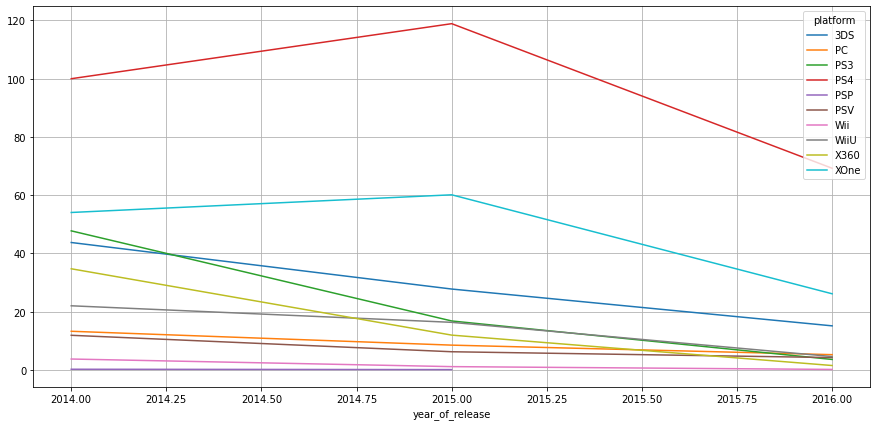

In [47]:
#Посмотрим продажи по платформам 
sales = data2.pivot_table(index='platform', values='amount',aggfunc='sum').sort_values(
    by='amount', ascending=False).head(10)
print(sales)
#Построим график распределения по годам 
(data2.pivot_table(index='year_of_release', columns = 'platform', values='amount', aggfunc='sum')
.plot(grid=True, figsize=(15, 7)))

Вывод:Из данных мы можем выделить две игровые платформы с наибольшими суммарными продажами это PS4,XOne

In [48]:
#выделим только интересующие нас платформы 
data2=data.query("platform == ['PS4','XOne']")
data2 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,amount
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,-1.0,unknow,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,-1.0,unknow,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,0,-1.0,unknow,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,unknow,0.01


#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

В данном обсуждении мы будем отталкиваться от актуального периода (2014-2016 года).
потенциально прибыльной платформой можно считать PS4,XOne.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [49]:
data2.groupby('platform')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


#### построим общую диаграмму размаха




(0.0, 1.95)

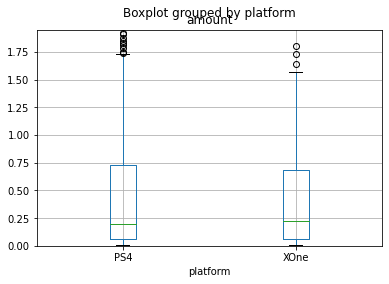

In [50]:
data2.boxplot(column='amount', by='platform');
plt.ylim(0,1.95)

Вывод:Просмотрев  диаграмму размаха мы видели частые выбросы и редкие.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

<AxesSubplot:xlabel='user_score', ylabel='amount'>

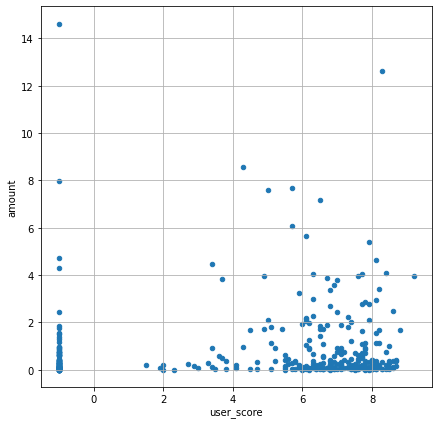

In [51]:
# Отзывы пользователей
(data2[data2['platform']=='PS4']
.plot(x='user_score', y='amount',kind='scatter', style='o', figsize=(7, 7), grid=True))

In [91]:
data_ps4 = data2[data2['platform']=='PS4']
data_ps4['user_score'].corr(data_ps4['amount']) 

0.1159614931286009

<AxesSubplot:xlabel='critic_score', ylabel='amount'>

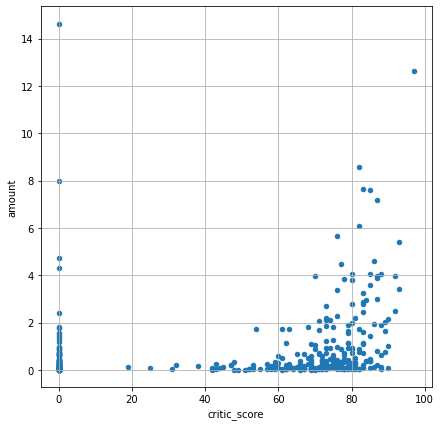

In [92]:
# Отзывы критиков
(data2[data2['platform']=='PS4']
.plot(x='critic_score', y='amount',kind='scatter', style='o', figsize=(7, 7), grid=True))

In [52]:
data_ps4 = data2[data2['platform']=='PS4']
data_ps4['critic_score'].corr(data_ps4['amount'])

0.22754960627752652

Вывод: Мы выяснили, что по данным из диаграммы рассеивания у нас:- слабо положительная корреляция 0.1159614931286009 по отзывам покупателей- слабо положительная корреляция 0.22754960627752652 по отзывам критиков

#### Соотнесите выводы с продажами игр на других платформах.

In [14]:
# Применим переменную data со всеми платформами
data.groupby('platform')['amount'].describe().sort_values(
    by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Wii,1320.0,0.687508,3.126609,0.01,0.0800,0.190,0.4825,82.54
NES,98.0,2.561735,5.108012,0.06,1.0000,1.375,2.2225,40.24
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
DS,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
X360,1262.0,0.769746,1.615674,0.01,0.1100,0.280,0.7575,21.82
PS3,1331.0,0.705973,1.391749,0.00,0.1100,0.270,0.7500,21.05
PS2,2161.0,0.581106,1.137927,0.00,0.0800,0.230,0.5600,20.81
SNES,239.0,0.836987,1.869469,0.01,0.1350,0.320,0.7050,20.62
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84


In [52]:
#Посчитаем корреляцию для PS2
data_PS2 = data[data['platform']=='PS2']
data_PS2['user_score'].corr(data_PS2['amount']) 

0.25936556441201697

In [53]:
data_PS2 = data[data['platform']=='PS2']
data_PS2['critic_score'].corr(data_PS2['amount'])

0.30072171894825006

Вывод:слабо положительная корреляция 0.25936556441201697 по отзывам покупателей- слабо положительная корреляция 0.30072171894825006 по отзывам критиков

In [57]:
#Посчитаем корреляцию для XOne
data_xb = data[data['platform']=='XOne']
data_xb['user_score'].corr(data_xb['amount']) 

0.12171152458232884

In [56]:
data_xb = data[data['platform']=='XOne']
data_xb['critic_score'].corr(data_xb['amount']) 

0.2748391874944539

Вывод:слабо положительная корреляция0.12171152458232884 по отзывам покупателей- слабо положительная корреляция 0.2748391874944539 по отзывам критиков

In [58]:
#Посчитаем корреляцию для XOne
data_X360 = data[data['platform']=='X360']
data_X360['user_score'].corr(data_X360['amount']) 

0.20727444033968057

In [59]:
data_X360 = data[data['platform']=='X360']
data_X360['critic_score'].corr(data_X360['amount']) 

0.31179658742695127

Вывод:слабо положительная корреляция 0.20727444033968057 по отзывам покупателей- слабо положительная корреляция 0.31179658742695127 по отзывам критиков

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:xlabel='genre'>

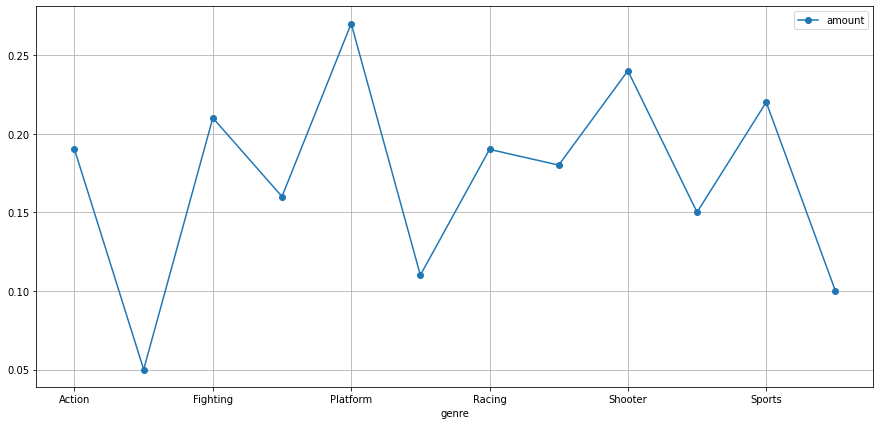

In [60]:
# посмотрим популярность жанров
(
data.pivot_table(index='genre', values='amount',aggfunc='median')
.plot(grid=True, figsize=(15, 7),style='o-')
)

Вывод: Популярные жанры:  Platform,Fighting,Shooter,Sports,Action

### Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP): 

In [55]:
#Для пользователя NA.Самые популярные платформы (топ-5).
NA_P = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
NA_P

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [56]:
#Продажи 
na_p1 = data.groupby('platform')['amount'].sum().sort_values(ascending=False).head()
na_p1

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: amount, dtype: float64

In [57]:
#Самые популярные жанры (топ-5) 
na_g = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
na_g

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

In [30]:
#Рейтинг
na_g1 = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
na_g1

rating
E         1292.99
unknow    1240.68
T          759.75
M          748.48
E10+       353.32
Name: na_sales, dtype: float64

ВЫВОД:
Для пользователей Северной Америке самые популярные платформы:X360,PS2,Wii,PS3,DS
Самые популярные жанры:Action,Sports,Shooter,Platform,Misc
В у рейтинга 'E' - «Для всех» продаж болше всего.

In [59]:
# Для пользователя EU.Самые популярные платформы (топ-5)
eu_p = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
eu_p

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

In [60]:
eu_p1 = data.groupby('platform')['amount'].sum().sort_values(ascending=False).head()
eu_p1

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: amount, dtype: float64

In [61]:
#Самые популярные жанры (топ-5)
eu_g = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
eu_g

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [31]:
#Рейтинг
eu_g1 = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
eu_g1

rating
E         710.25
unknow    613.30
M         483.97
T         427.03
E10+      188.52
Name: eu_sales, dtype: float64

ВЫВОД:
Для пользователей Евррпы самые популярные платформы:PS2,PS3,X360,Wii,DS
Самые популярные жанры:Action,Sports,Shooter,Platform,Misc
В у рейтинга 'E' - «Для всех» продаж болше всего.

In [32]:
# Для пользователя JP.Самые популярные платформы (топ-5)
jp_p = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
jp_p

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

In [64]:
#Самые популярные жанры (топ-5)
jp_g = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
jp_g

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

In [33]:
#Рейтинг
jp_g1 = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()
jp_g1

rating
unknow    841.93
E         198.11
T         151.40
M          64.24
E10+       40.20
Name: jp_sales, dtype: float64

ВЫВОД:
Для пользователей Японии самые популярные платформы:DS,PS,PS2,SNES,3DS
Самые популярные жанры:Role-Playing,Action,Sports,Platform,Misc
В у рейтинга 'unknow' - продаж болше всего.

### Проверьте гипотезы

In [69]:
# Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
# H0: средние рейтинги по платформам одинаковые
# H1: средние рейтинги по платформам разные

data = data[data['user_score'] != -1]

data2_xb = data[data['platform'] == 'XOne']['user_score']
data2_pc = data[data['platform'] == 'PC']['user_score']

alpha =0.05

results =st.ttest_ind(
    data2_xb, 
    data2_pc,equal_var = False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183574e-06
Отвергаем нулевую гипотезу


In [68]:
# Гипотеза: Средние пользовательские рейтинги жанров Action  и Sports
# H0:средние рейтинги по жанрам одинаковые
# H1:средние рейтинги по жанрам разные

data = data[data['user_score'] != -1]

data2_ac = data[data['genre'] == 'Action']['user_score']
data2_sp = data[data['genre'] == 'Sports']['user_score']


alpha =0.05
results = st.ttest_ind(
data2_ac,
data2_sp)



print('p-значение:',results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Вывод:
В первой гипотезе:
Результат говорит о том, что нулевая гипотеза отвергается.
p-значение: 4.935072360183574e-06
Во второй гипотезе:
Результат говорит о том, что не получилось отвергнуть нулевую гипотезу
p-значение: 0.10406951359049141



### Напишите общий вывод

Был анализирован период с 2014-2016 года, и в этот период у нас были выбраны 2 платформы: PS4 и XOne, которые на этот момент обладали самыми большими продажами.

Жанры игр страны предпочитают разные, но большинство склоняется к жанру Action

А вот ТОП рейтинг от организации ESRB можно считать категорию 'E' - «Для всех»
